# Insurance Charges Dataset
In this notebook, I will analyse and create a linear regression model for the "Insurance Charges Dataset", that will predict the persons insurance charges based on their personal data

Source: https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/

# Imports and data


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [60]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

Let's firstly check if there are no null values


In [61]:
print(df.isna().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


## Variables


Each row represents a person and their personal data. The variables represent:
- age (numerical) - age in years (between 18 and 64)
- sex (categorical) - female or male
- bmi (numerical) - Body Mass Index, the person's body mass in kg divided by their height in meters squared
- children (numerical) - number of children
- smoker (categorical) - if the person smokes, yes or no
- region (categorical) - region of the US from which the person comes from: southeast, southwest, northeast, northwest.
- charges (numerical) - the insurance charges of the person in dolars

In order to use the dataframe, we need to represent categorical values with numbers. Let's set:
- smoker: yes to 1 and no to 0
- sex: female to 0 and male to 1
And let's create the dummy variables for the region

In [62]:
df = df.replace({'female' : 0, 'male' : 1, 'yes' : 1, 'no' : 0})
df = pd.get_dummies(df)
df.head()

/tmp/ipython-input-2568538331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'female' : 0, 'male' : 1, 'yes' : 1, 'no' : 0})


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


Our data base has 1,338 samples each with 7 attributes. Each sample represent a single person.

## Brief description

Firstly let's describe the dataframe

In [63]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


## Data Visualization


And let's see how variables correlate

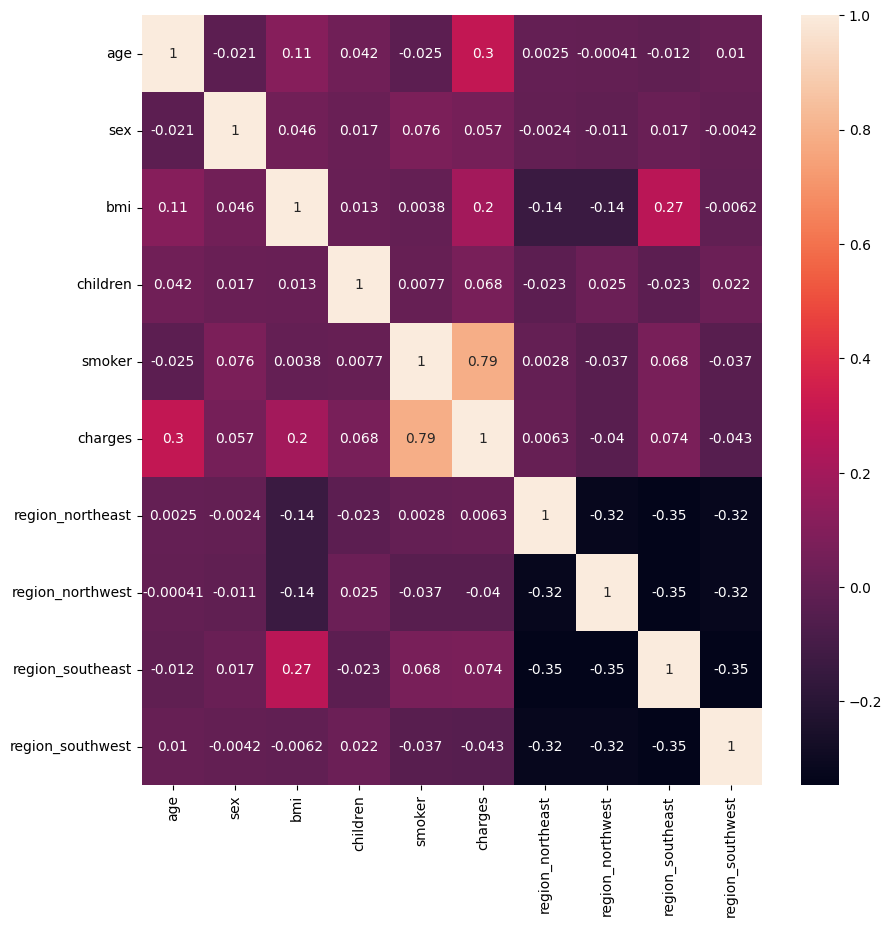

In [64]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

As we see, the charges correlates the most with: smoker status, bmi and age.

In [65]:
print("Charges with smoker: ", df['charges'].corr(df['smoker']))
print("Charges with bmi: ", df['charges'].corr(df['bmi']))
print("Charges with age: ", df['charges'].corr(df['age']))

Charges with smoker:  0.787251430498478
Charges with bmi:  0.19834096883362895
Charges with age:  0.2990081933306476


Avarage charges by each age for smokers and non smokers are:

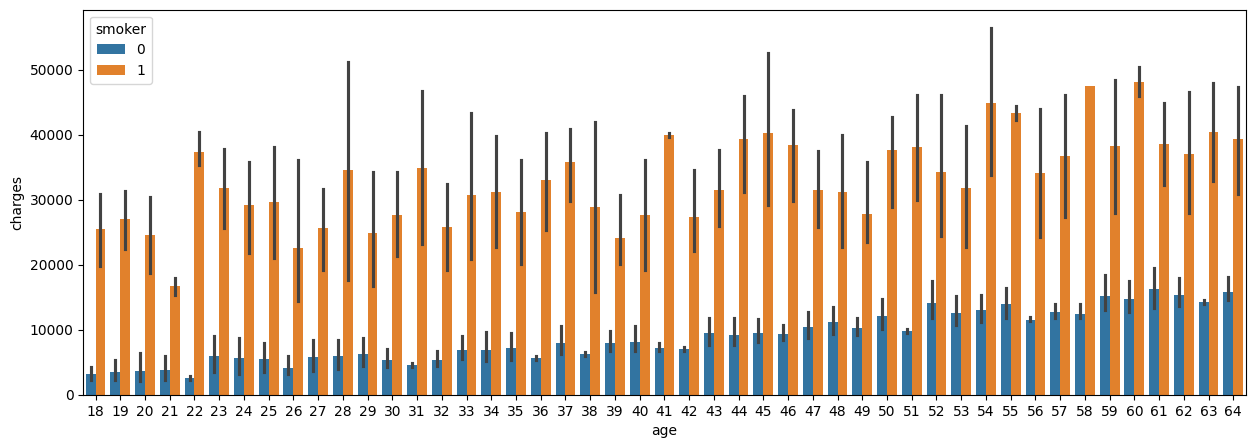

In [66]:
avgs = df.groupby(['age', 'smoker'])['charges'].mean()
plt.figure(figsize = (15,5))
sns.barplot(x = 'age', y = 'charges', hue = 'smoker', data = df)
plt.show()

And fraction of all charges by age is:

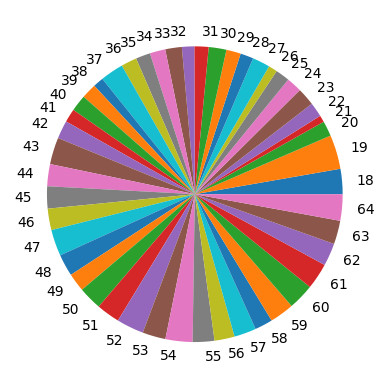

In [67]:
sums = []
for i in range(18, 65):
  sums.append(df[df['age'] == i]['charges'].sum())
plt.pie(sums, labels = range(18, 65))
plt.show()

# Regression model


We want to build a regression model that predicts charges based on the other factors

## Linear regression
Let's start with one dimensional linear regression for all the variables

In [68]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].values.reshape(-1,9)
y = df.charges.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 6)

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Mean squared error: ", mean_squared_error(y_test, prediction))

Mean squared error:  31439669.909655854


Now let's check linear regression with 3 most correlating variables and check its performance.

In [69]:
x = df[['age', 'bmi', 'smoker']].values.reshape(-1,3)
y = df.charges.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 6)

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Mean squared error: ", mean_squared_error(y_test, prediction))

Mean squared error:  31639113.92139352


As we see, the mean squared error is not

## Polynomial regression


Let's try to test the model with polynomial regression. As we do not know yet what degree should we choose, let's try to create the model for degrees in range from 1 to 9 and then we check which one has the best score


In [70]:
scores = []
for i in range(1,9):
  poly = PolynomialFeatures(degree = i)
  x_poly = poly.fit_transform(x)
  x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.3, random_state = 6)

  model = LinearRegression()
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  scores.append(mean_squared_error(y_test, prediction))

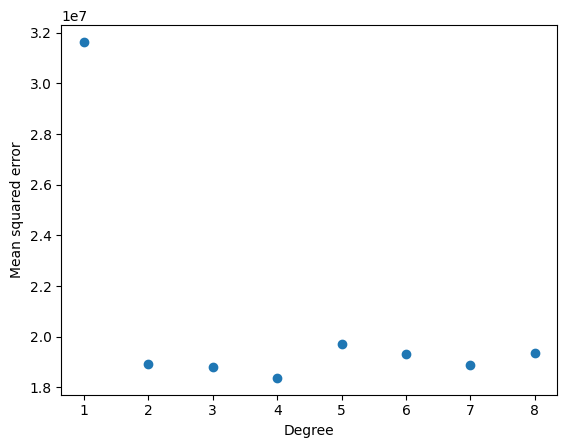

In [71]:
plt.scatter(range(1,9), scores)
plt.xlabel("Degree")
plt.ylabel("Mean squared error")
plt.show()

As we see, the best model is the one with degree of 4.

Let's recreate the best model and predict some charges for a given person

In [72]:
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.3, random_state = 6)

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

Let's check the probable insurance charge for a 22 years old with bmi 22.7 who does not smoke.

In [73]:
example_poly = poly.transform([[20, 25.6, 1]])
example = model.predict(example_poly)
example

array([17741.71825894])